本节主要练习使用sklearn进行数据预处理

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits
# 导入手写字体数据集
X, y = load_digits(return_X_y=True)

The digit in the image is 0


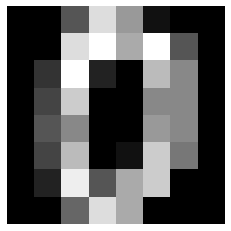

In [4]:
plt.imshow(X[0].reshape(8, 8), cmap='gray') # 完成灰度图绘制
plt.axis('off')
print('The digit in the image is {}'.format(y[0]))  # 格式化打印

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# 划分数据为训练集与测试集,添加stratify参数，以使得训练和测试数据集的类分布与整个数据集的类分布相同。

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs", multi_class="ovr", max_iter=5000, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy score of the {} is {:.2f}".format(model.__class__.__name__, accuracy))
print("{} required {} iterations to be fitted".format(model.__class__.__name__, model.n_iter_[0]))

Accuracy score of the LogisticRegression is 0.96
LogisticRegression required 128 iterations to be fitted


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy score of the {} is {:.2f}".format(model.__class__.__name__, accuracy))

Accuracy score of the RandomForestClassifier is 0.96


In [9]:
from sklearn.datasets import load_breast_cancer

X_breast, y_breast = load_breast_cancer(return_X_y=True)
X_breast_train, X_breast_test, y_breast_train, y_breast_test = train_test_split(X_breast, y_breast, stratify=y_breast, random_state=0, test_size=0.3)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, random_state=0)
model.fit(X_breast_train, y_breast_train)

GradientBoostingClassifier(random_state=0)

In [11]:
y_pred = model.predict(X_breast_test)

In [12]:
from sklearn.metrics import balanced_accuracy_score

accuracy = balanced_accuracy_score(y_breast_test, y_pred)
print("Accuracy score of the {} is {:.2f}".format(model.__class__.__name__, accuracy))

Accuracy score of the GradientBoostingClassifier is 0.94


In [14]:
print("{} required {} iterations to be fitted".format(model.__class__.__name__, model.n_iter_[0]))

AttributeError: 'GradientBoostingClassifier' object has no attribute 'n_iter_'